# Part One
Use ready weights to localization data.



In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install

Cloning into 'yolov5'...
remote: Enumerating objects: 10008, done.
remote: Total 10008 (delta 0), reused 0 (delta 0), pack-reused 10008
Receiving objects: 100% (10008/10008), 10.31 MiB | 28.77 MiB/s, done.
Resolving deltas: 100% (6945/6945), done.
/content/yolov5
     |████████████████████████████████| 596 kB 4.8 MB/s 


In [ ]:
!python detect.py --source 'data/images/bus.jpg'

detect: weights=yolov5s.pt, source=data/images/bus.jpg, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-103-g7a39803 torch 1.10.0+cu111 CPU

100% 14.0M/14.0M [00:00<00:00, 107MB/s] 

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, Done. (0.328s)
Speed: 4.0ms pre-process, 327.8ms inference, 16.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


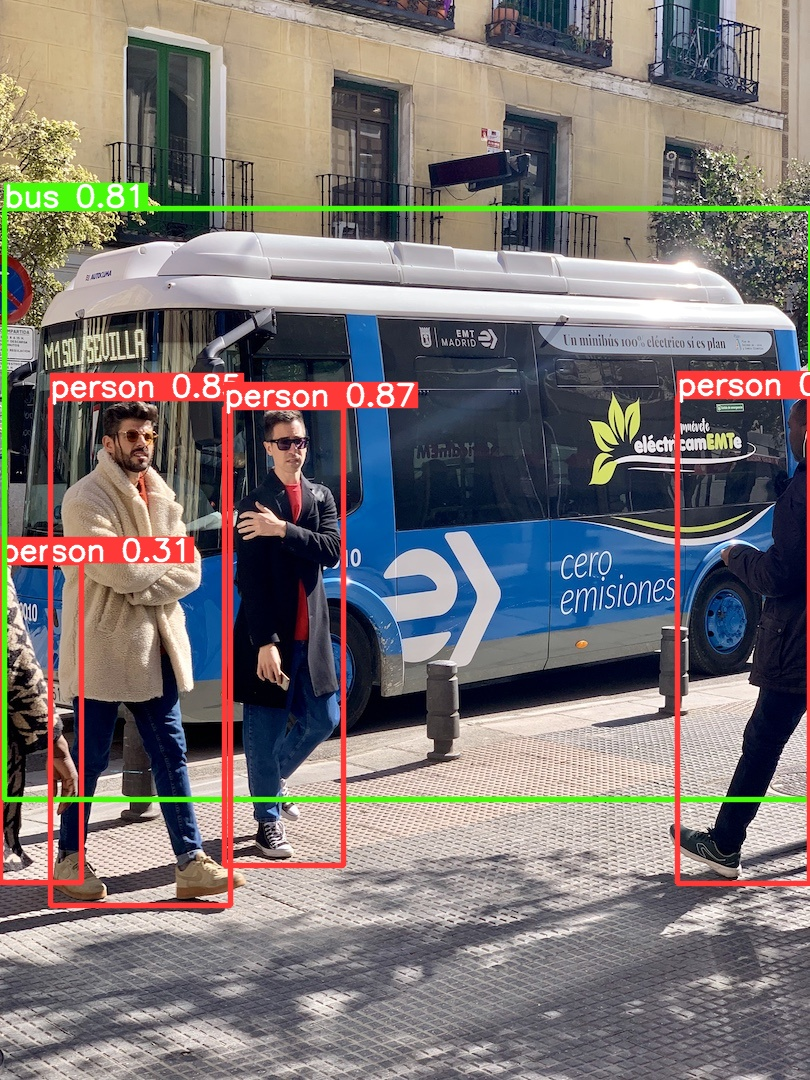

In [ ]:
from IPython.display import Image
Image(filename='runs/detect/exp/bus.jpg', width=400)

# Part Two
Use coco-dataset to train our yolo model.

note : we will use coco128 which is only 128 first photos of coco dataset to train model faster.

In [ ]:
!unzip "coco128"
%cd yolov5

Archive:  coco128.zip
  inflating: coco128/LICENSE         
  inflating: coco128/README.txt      
  inflating: coco128/images/train2017/000000000009.jpg  
  inflating: coco128/images/train2017/000000000025.jpg  
  inflating: coco128/images/train2017/000000000030.jpg  
  inflating: coco128/images/train2017/000000000034.jpg  
  inflating: coco128/images/train2017/000000000036.jpg  
  inflating: coco128/images/train2017/000000000042.jpg  
  inflating: coco128/images/train2017/000000000049.jpg  
  inflating: coco128/images/train2017/000000000061.jpg  
  inflating: coco128/images/train2017/000000000064.jpg  
  inflating: coco128/images/train2017/000000000071.jpg  
  inflating: coco128/images/train2017/000000000072.jpg  
  inflating: coco128/images/train2017/000000000073.jpg  
  inflating: coco128/images/train2017/000000000074.jpg  
  inflating: coco128/images/train2017/000000000077.jpg  
  inflating: coco128/images/train2017/000000000078.jpg  
  inflating: coco128/images/train2017/000000000

In [ ]:
import cv2
im = cv2.imread('coco128/images/train2017/000000000009.jpg')
print(im.shape)

(480, 640, 3)


In [ ]:
!python train.py --img 640 --batch 16 --epochs 5 --data coco128.yaml --weights '' --cfg yolov5s.yaml

train: weights=, cfg=yolov5s.yaml, data=coco128.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=5, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-103-g7a39803 torch 1.10.0+cu111 CPU

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0,

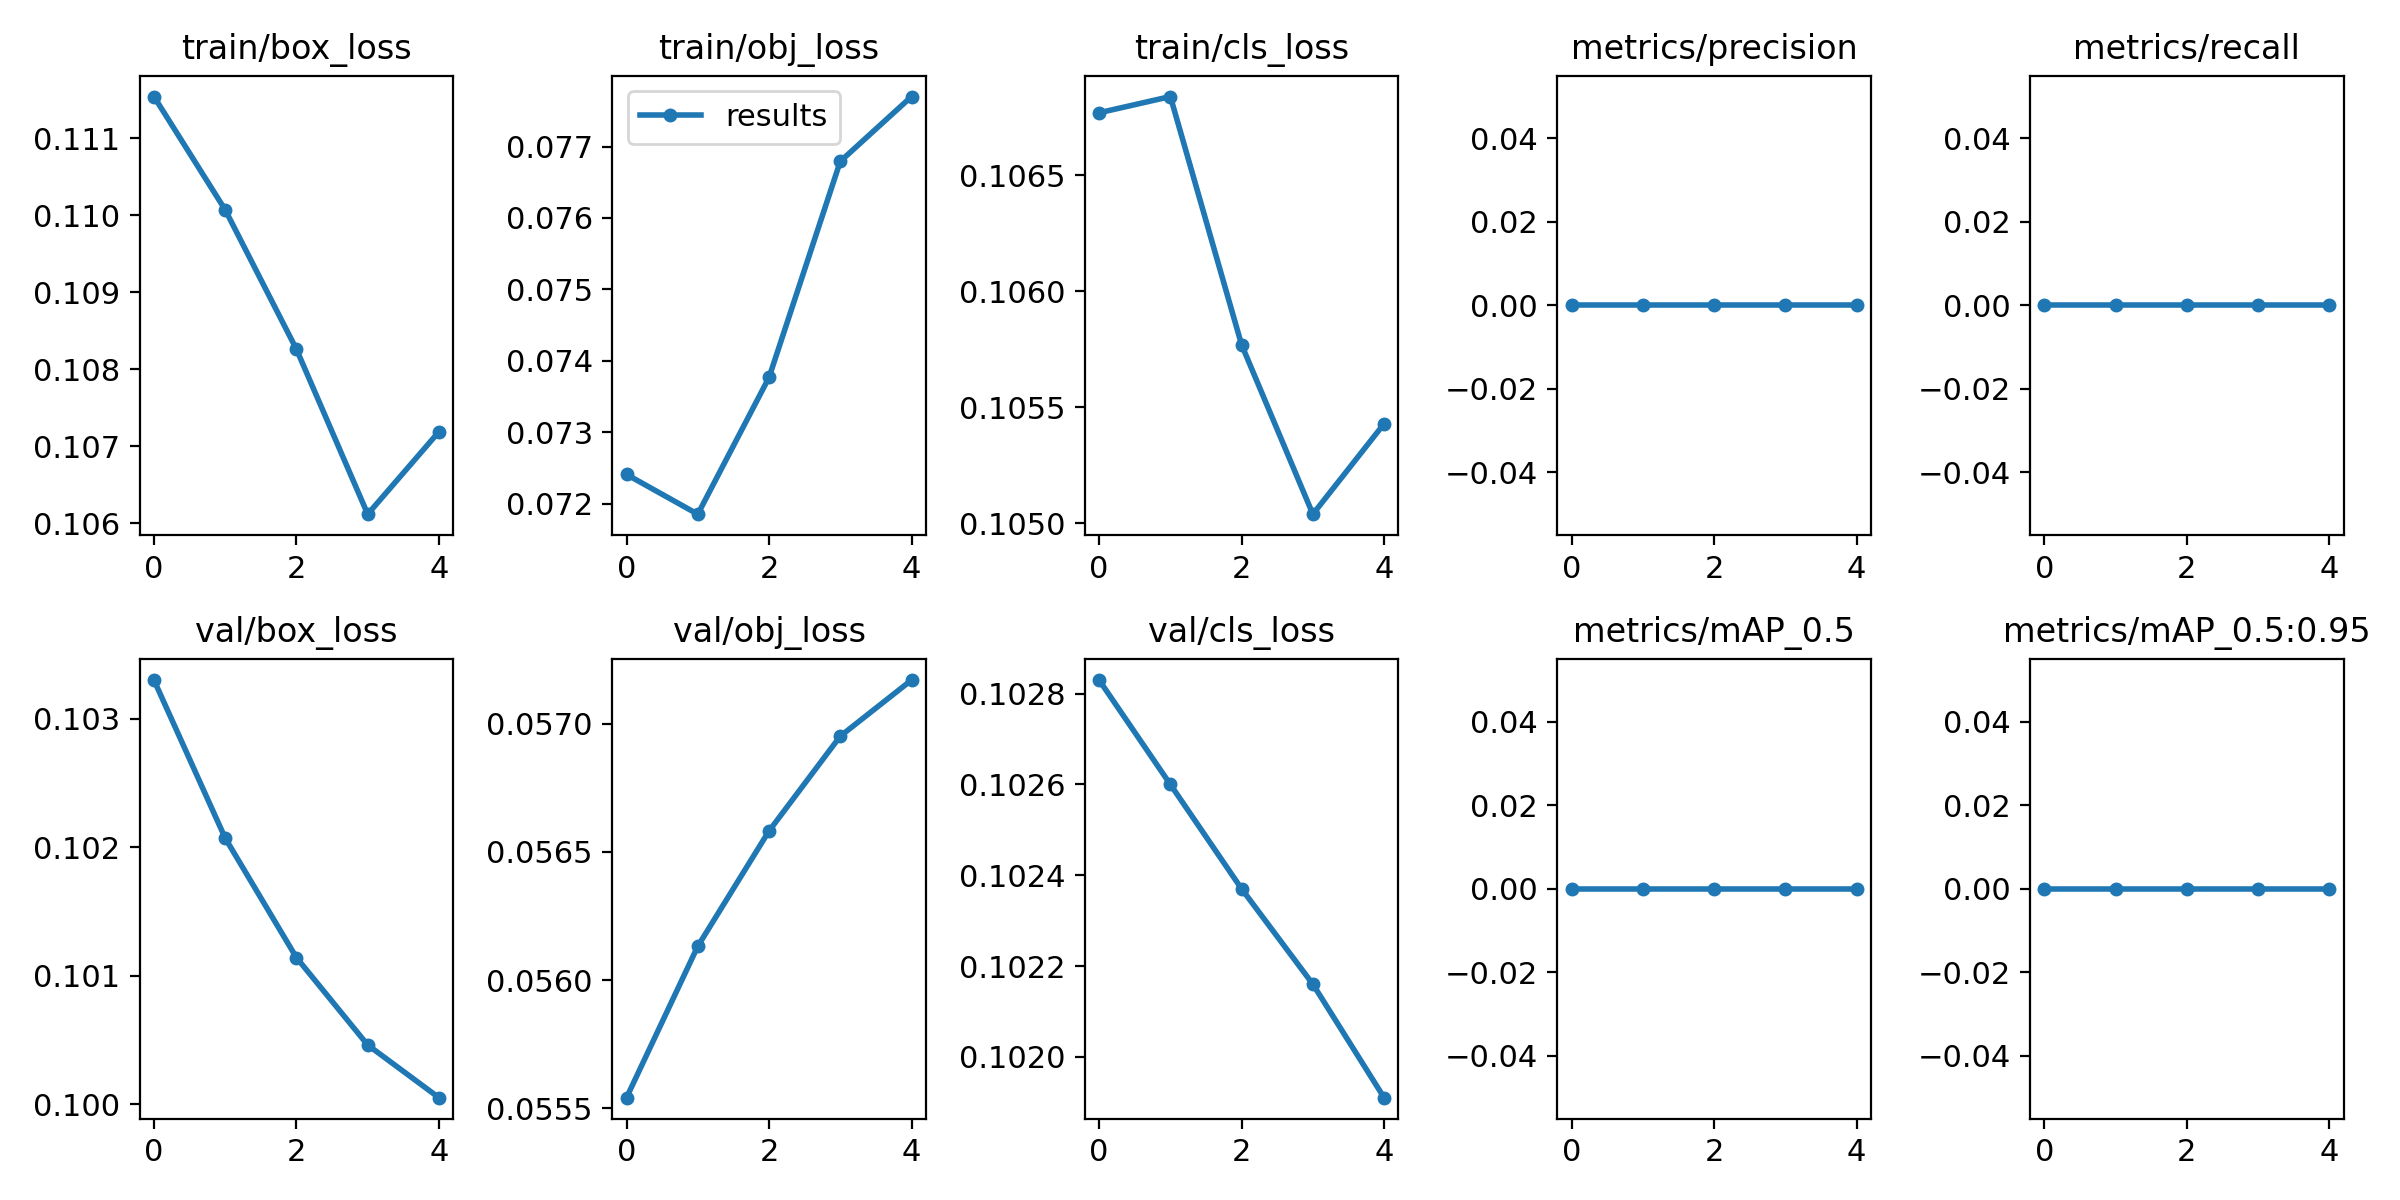

In [ ]:
Image(filename='runs/train/exp/results.png', width=700)

# Part Three

> Indented block


create a data-set(photo of a mug in different positions)

In [ ]:
!unzip mug1

Archive:  mug1.zip
   creating: mug1/images/
   creating: mug1/images/test/
  inflating: mug1/images/test/CameraZOOM-20211123151541402.jpg  
  inflating: mug1/images/test/CameraZOOM-20211123151613764.jpg  
  inflating: mug1/images/test/CameraZOOM-20211123151650598.jpg  
  inflating: mug1/images/test/CameraZOOM-20211123151720239.jpg  
  inflating: mug1/images/test/CameraZOOM-20211123151759429.jpg  
  inflating: mug1/images/test/CameraZOOM-20211123151838944.jpg  
  inflating: mug1/images/test/CameraZOOM-20211123151847155.jpg  
  inflating: mug1/images/test/CameraZOOM-20211123151911075.jpg  
  inflating: mug1/images/test/CameraZOOM-20211123151919509.jpg  
  inflating: mug1/images/test/CameraZOOM-20211123151945566.jpg  
  inflating: mug1/images/test/CameraZOOM-20211123152001140.jpg  
  inflating: mug1/images/test/CameraZOOM-20211123152014266.jpg  
   creating: mug1/images/train/
  inflating: mug1/images/train/CameraZOOM-20211123151442051.jpg  
  inflating: mug1/images/train/CameraZOOM-2021

In [ ]:
import cv2
im = cv2.imread('mug1/images/train/CameraZOOM-20211123151442051.jpg')
print(im.shape)

(640, 480, 3)


In [ ]:
%cd yolov5

/content/yolov5


In [ ]:
!python train.py --img 640 --batch 16 --epochs 5 --data mug.yaml --weights '' --cfg yolov5s.yaml

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 3
wandb: You chose 'Don't visualize my results'
train: weights=, cfg=yolov5s.yaml, data=mug.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=5, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-103-g7a39803 torch 1.10.0+cu111 CPU

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_l

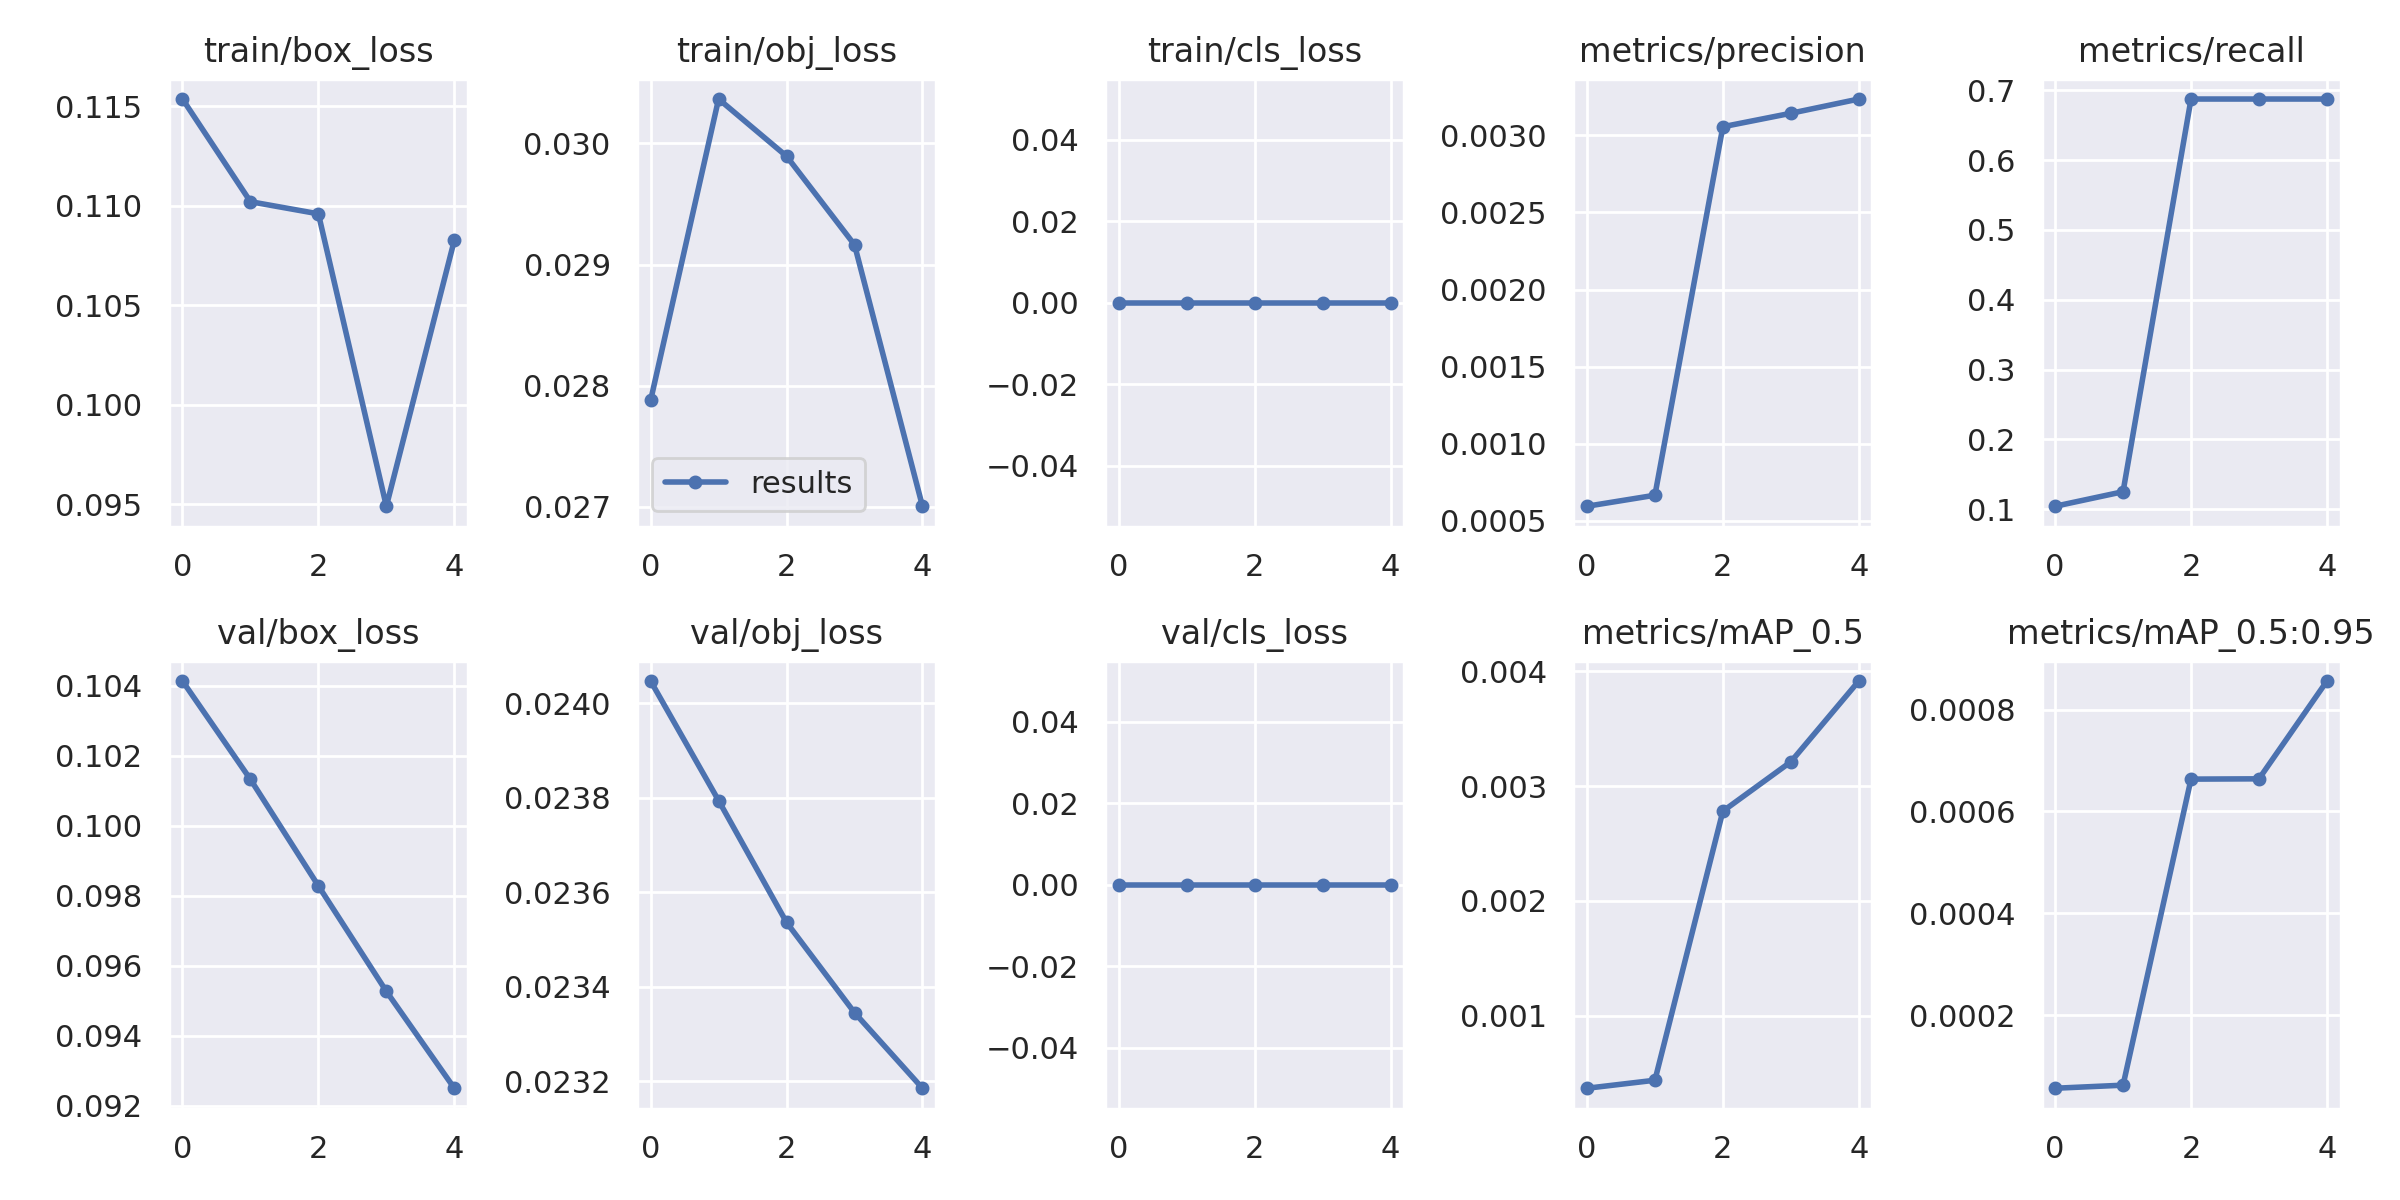

In [ ]:
Image(filename='runs/train/exp4/results.png', width=700)

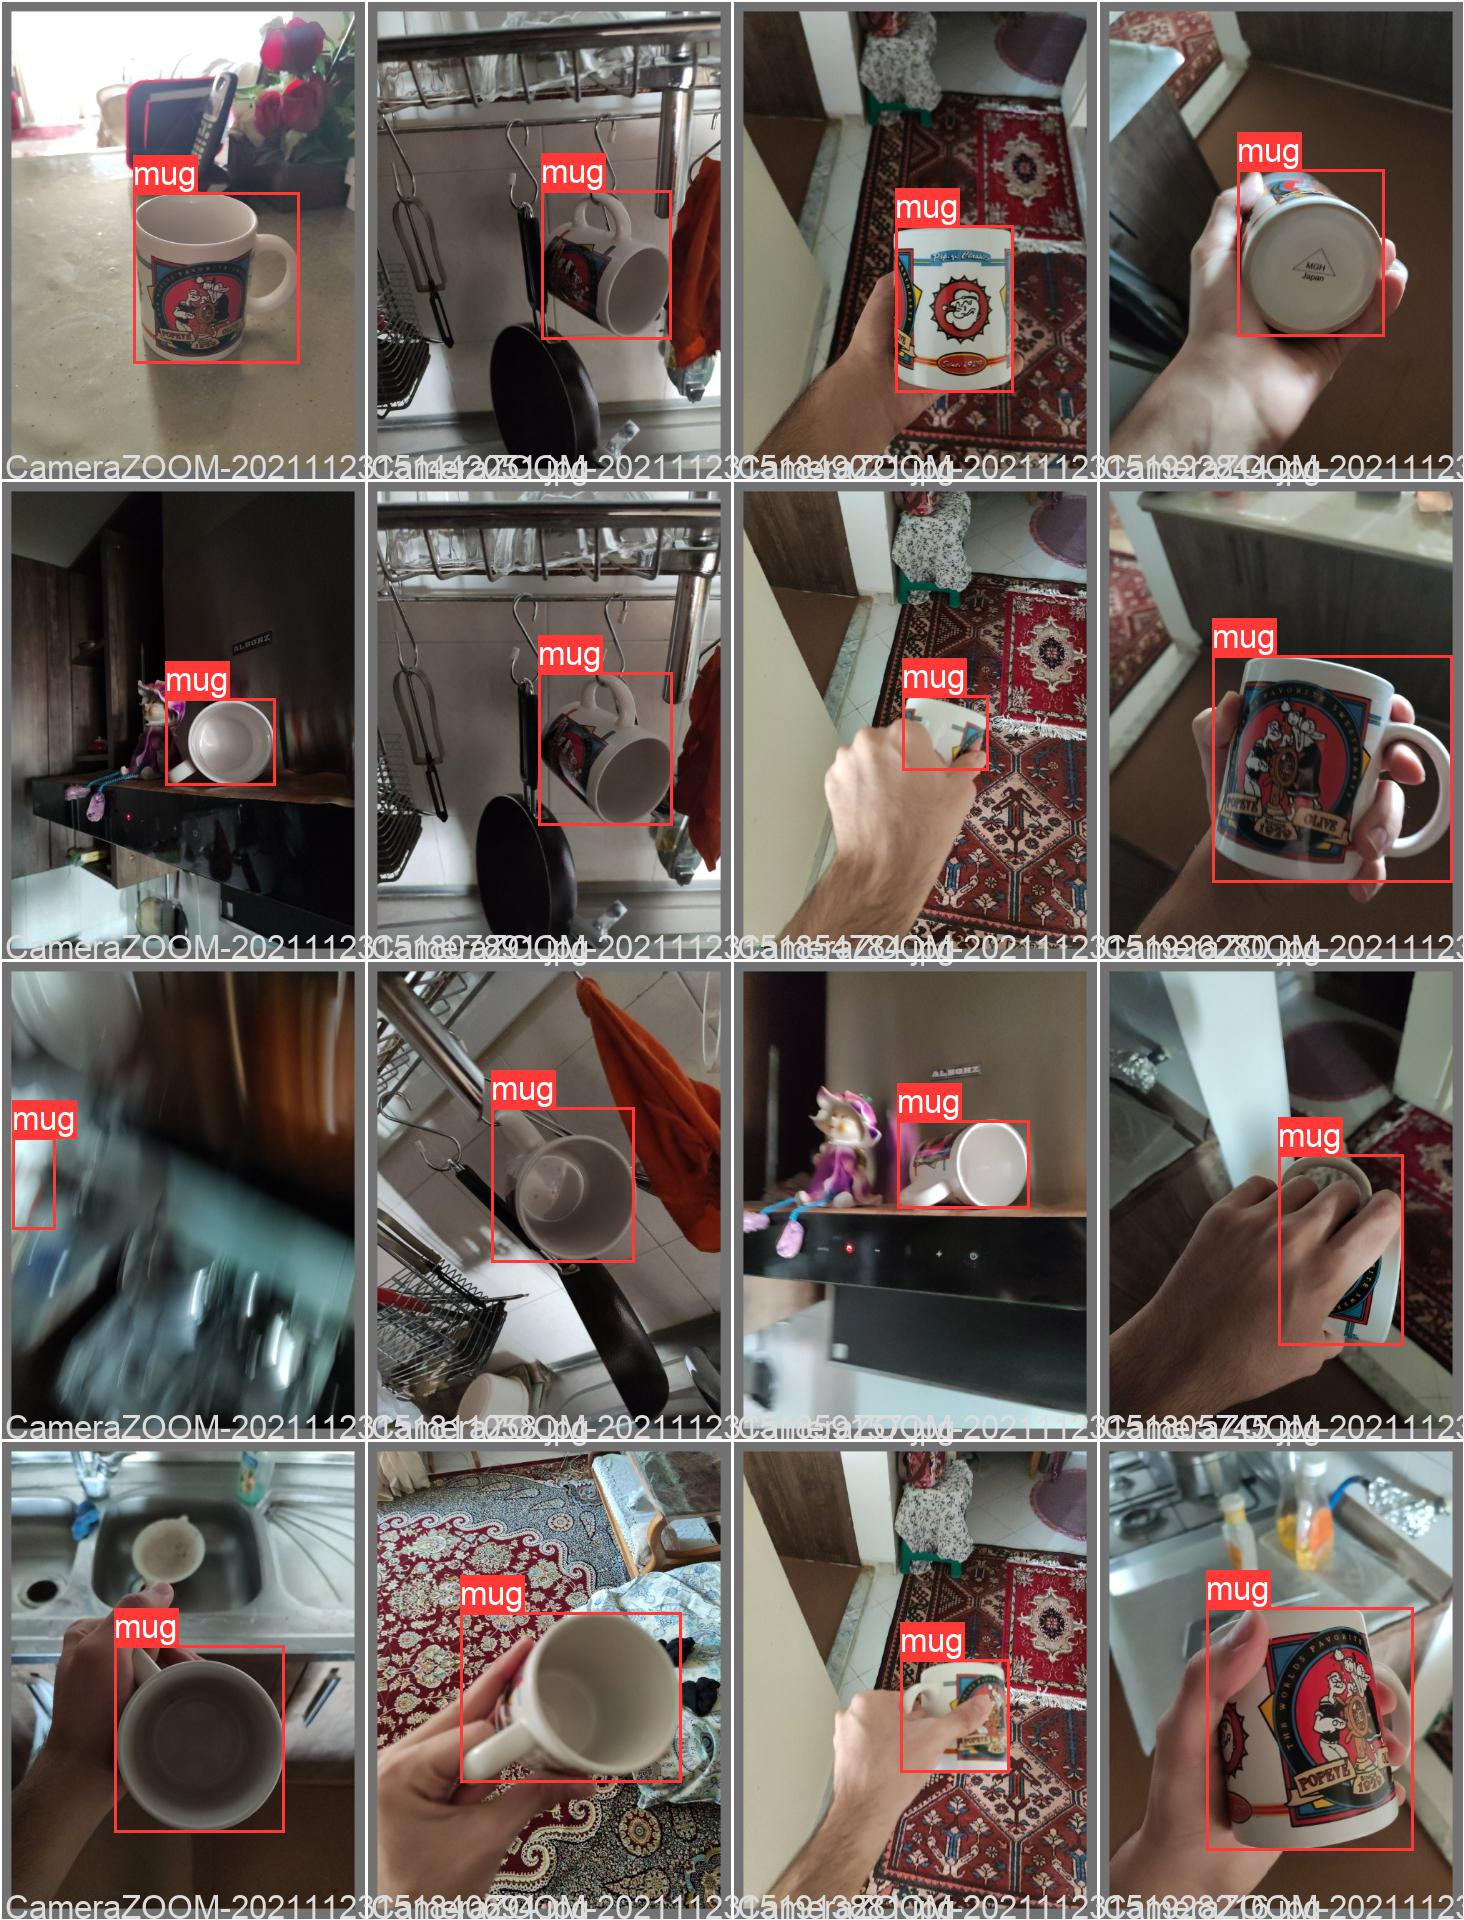

In [ ]:
Image(filename='runs/train/exp4/val_batch0_labels.jpg', width=700)